In [35]:
import numpy as np         
import pandas as pd
import matplotlib.pyplot as plt      
import random                        

from keras.datasets import mnist     
from keras.models import Sequential  

from keras.layers.core import Dense, Dropout, Activation 
from keras.utils import np_utils                         

In [36]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [37]:
test_data = pd.read_csv('/test.csv', delimiter = ',', header = 0, usecols = [x for x in range(0, 784)])

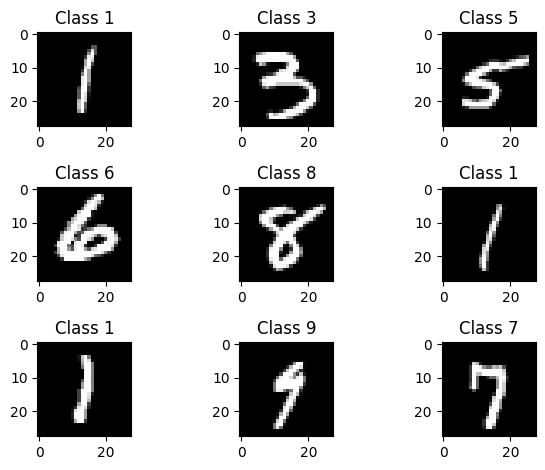

In [38]:
for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

In [39]:
X_train = X_train.reshape(60000, 784) 
X_test = X_test.reshape(10000, 784)   

X_train = X_train.astype('float32')   
X_test = X_test.astype('float32')

X_train /= 255                        
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [40]:
no_classes = 10

Y_train = np_utils.to_categorical(y_train, no_classes)
Y_test = np_utils.to_categorical(y_test, no_classes)

In [47]:
model = Sequential()

In [48]:
model.add(Dense(512, input_shape=(784,))) 

In [49]:
model.add(Activation('relu'))

In [50]:
model.add(Dropout(0.2))

In [51]:
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

In [52]:
model.add(Dense(10))
model.add(Activation('softmax'))

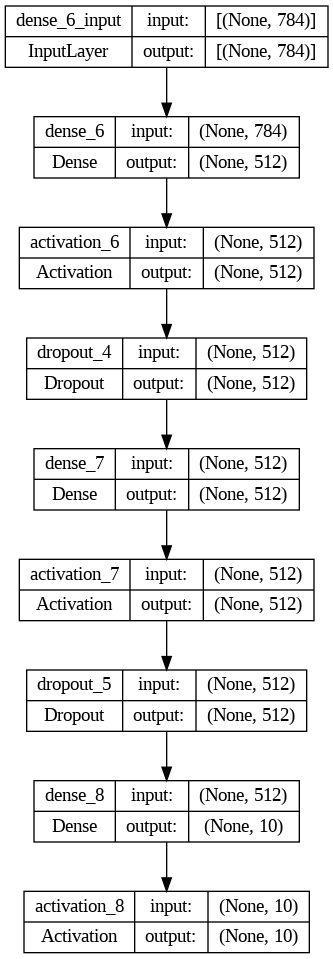

In [53]:
from keras.utils import plot_model
plot_model(model, to_file='model_chart.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image("model_chart.png")

In [54]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [55]:
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=10,
          verbose=1)

Epoch 1/10
469/469 [==============================] - 12s 25ms/step - loss: 0.2555 - accuracy: 0.9233
Epoch 2/10
469/469 [==============================] - 11s 24ms/step - loss: 0.1009 - accuracy: 0.9686
Epoch 3/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0696 - accuracy: 0.9786
Epoch 4/10
469/469 [==============================] - 11s 24ms/step - loss: 0.0548 - accuracy: 0.9822
Epoch 5/10
469/469 [==============================] - 11s 25ms/step - loss: 0.0489 - accuracy: 0.9840
Epoch 6/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0356 - accuracy: 0.9882
Epoch 7/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0330 - accuracy: 0.9888
Epoch 8/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0302 - accuracy: 0.9897
Epoch 9/10
469/469 [==============================] - 11s 24ms/step - loss: 0.0271 - accuracy: 0.9908
Epoch 10/10
469/469 [==============================] - 11s 24ms/step - loss: 0.025

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
score = model.evaluate(X_test, Y_test)
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0643 - accuracy: 0.9831
Test accuracy: 0.9830999970436096


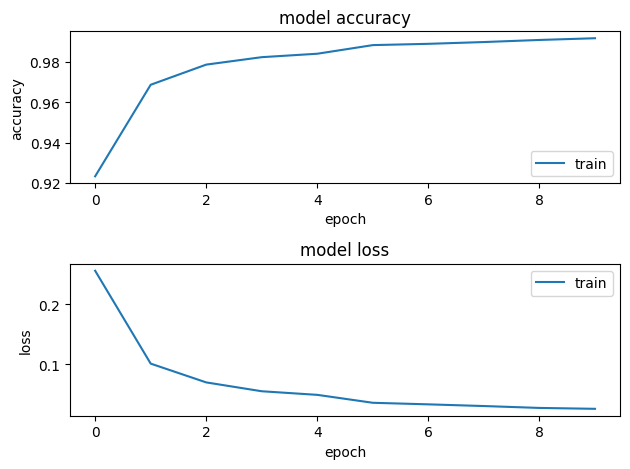

In [58]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [59]:
results = model.predict(test_data)

875/875 [==============================] - 3s 4ms/step


In [79]:
results = np.argmax(results, axis =0)
results = pd.Series(results,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("/submission.csv",index=False)

In [33]:
submission

,ImageId,Label
0,1,2.0
1,2,0.0
2,3,9.0
3,4,0.0
4,5,3.0
...,...,...
27995,27996,NaN
27996,27997,NaN
27997,27998,NaN
27998,27999,NaN


In [81]:
predicted_classes = np.argmax(model.predict(X_test), axis=-1)

correct_indices = np.nonzero(predicted_classes == y_test)[0]

incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

313/313 [==============================] - 1s 3ms/step


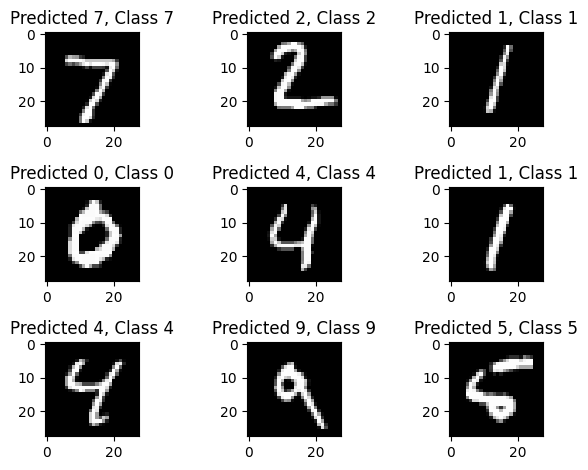

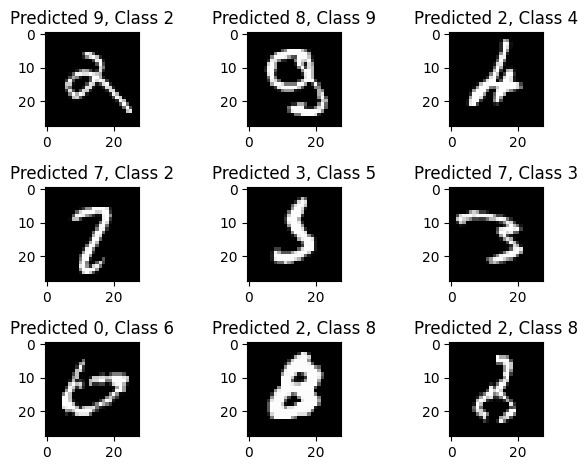

In [82]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.tight_layout()
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    
plt.tight_layout()